In [1]:
# Load Unnormalized Read Counts
unnormalized_counts = "../GLDS-202_Unnormalized_Counts.txt"
cts <- as.matrix(read.table(unnormalized_counts, sep="\t", row.names="GeneID", header=TRUE))

In [2]:
# Load Annotations
annotations = "../GLDS-202_203/GLDS-202_SampleTable.csv"
coldata <- read.csv(annotations, row.names=1)

In [3]:
# Retrieve only Retina data
coldata = coldata[coldata$Material %in% "brain", ]

In [4]:
coldata

,Radiation,Unloading,Material,Time
CFG2006,0.4gray,Loaded,brain,1month
CFG2007,0.4gray,Loaded,brain,1month
CFG2008,0.4gray,Loaded,brain,1month
CFG2009,0.4gray,Loaded,brain,1month
CFG2010,0.4gray,Loaded,brain,1month
CFG2011,0.4gray,Loaded,brain,1month
CFG2012,0.4gray,Unloaded,brain,1month
CFG2013,0.4gray,Unloaded,brain,1month
CFG2014,0.4gray,Unloaded,brain,1month
CFG2015,0.4gray,Unloaded,brain,1month


In [5]:
# Brain Counts Only
brain_cts = cts[ , (colnames(cts) %in% c(rownames(coldata)))]

# DESeq2 requires integers
brain_cts = round(brain_cts)

In [6]:
head(brain_cts)

,CFG2006,CFG2007,CFG2008,CFG2009,CFG2010,CFG2011,CFG2012,CFG2013,CFG2014,CFG2015,⋯,CFG2036,CFG2037,CFG2038,CFG2039,CFG2040,CFG2041,CFG2042,CFG2043,CFG2044,CFG2045
ENSMUSG00000000001.4,276,277,295,267,292,325,377,274,303,258,⋯,249,263,246,303,209,249,355,226,477,284
ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028.15,9,17,11,13,8,13,15,15,18,7,⋯,10,25,14,14,10,19,24,18,36,16
ENSMUSG00000000031.16,19,4,24,2,1,8,39,2,11,1,⋯,8,8,1,13,10,13,0,22,6,12
ENSMUSG00000000037.16,15,12,15,7,18,11,34,26,14,13,⋯,6,3,5,4,1,29,4,4,16,6
ENSMUSG00000000049.11,0,0,5,1,1,3,3,2,1,0,⋯,3,2,0,0,2,0,1,0,2,1


In [7]:
# Confirm that coldata and retina counts are ordered the same
all(rownames(coldata) == colnames(brain_cts))

[1] TRUE

In [8]:
##### Filter colnames for all comparisons #####

### Time = 1 Month ###
timepoint = "1month"

# Condition = Radiation and Control
brain_1month_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
brain_1month_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
brain_1month_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))


### Time = 4 Month ###
timepoint = "4month"

# Condition = Radiation and Control
brain_4month_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
brain_4month_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
brain_4month_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

In [16]:
##### Filter counts for all comparisons #####

brain_1month_radiation_cts = brain_cts[ , (colnames(brain_cts) %in% c(rownames(brain_1month_radiation_colnames)))]
brain_1month_unloaded_cts = brain_cts[ , (colnames(brain_cts) %in% c(rownames(brain_1month_unloaded_colnames)))]
brain_1month_combination_cts = brain_cts[ , (colnames(brain_cts) %in% c(rownames(brain_1month_combination_colnames)))]

brain_4month_radiation_cts = brain_cts[ , (colnames(brain_cts) %in% c(rownames(brain_4month_radiation_colnames)))]
brain_4month_unloaded_cts = brain_cts[ , (colnames(brain_cts) %in% c(rownames(brain_4month_unloaded_colnames)))]
brain_4month_combination_cts = brain_cts[ , (colnames(brain_cts) %in% c(rownames(brain_4month_combination_colnames)))]

In [17]:
# Verify that annotations and counts are in the same order (DESeq2 requirement)

# 1month timepoint
all(rownames(brain_1month_radiation_colnames) == colnames(brain_1month_radiation_cts))
all(rownames(brain_1month_unloaded_colnames) == colnames(brain_1month_unloaded_cts))
all(rownames(brain_1month_combination_colnames) == colnames(brain_1month_combination_cts))

# 1month timepoint
all(rownames(brain_4month_radiation_colnames) == colnames(brain_4month_radiation_cts))
all(rownames(brain_4month_unloaded_colnames) == colnames(brain_4month_unloaded_cts))
all(rownames(brain_4month_combination_colnames) == colnames(brain_4month_combination_cts))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [20]:
run_DESeq2 <- function(counts, labels, comparison, timepoint)
{    
    # Organize data into DESeq2 compatible object
    if (comparison == "radiation" || comparison == "combination")
    {
        dds <- DESeqDataSetFromMatrix(countData = counts,
                                  colData = labels,
                                  design = ~ Radiation)
    }
    else if (comparison == "unloaded")
    {
        dds <- DESeqDataSetFromMatrix(countData = counts,
                                  colData = labels,
                                  design = ~ Unloading)            
    }
    else
    {
        print ("Unrecognized Comparison Argument.")
        return ()
    }
    
    # Prefilter to speed up computation and reduce size of dds
    keep <- rowSums(counts(dds)) >= 10
    dds <- dds[keep,]
    
    # Run DESeq2
    dds <- DESeq(dds)
    
    # Save Results for Future Analysis
    save_name = paste("../R_objects/", "brain_", timepoint, "_", comparison, "Vcontrol_dds.RData", sep="")
    save(dds, file=save_name)
    
    # Return Results for Histogram Plotting
    res <- results(dds)
    return (res)
}

In [21]:
library("DESeq2")

res_1month_radiation = run_DESeq2(brain_1month_radiation_cts, brain_1month_radiation_colnames, "radiation", "1month")
res_1month_unloaded = run_DESeq2(brain_1month_unloaded_cts, brain_1month_unloaded_colnames, "unloaded", "1month")
res_1month_combination = run_DESeq2(brain_1month_combination_cts, brain_1month_combination_colnames, "combination", "1month")

res_4month_radiation = run_DESeq2(brain_4month_radiation_cts, brain_4month_radiation_colnames, "radiation", "4month")
res_4month_unloaded = run_DESeq2(brain_4month_unloaded_cts, brain_4month_unloaded_colnames, "unloaded", "4month")
res_4month_combination = run_DESeq2(brain_4month_combination_cts, brain_4month_combination_colnames, "combination", "4month")

converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
converting counts to integer m

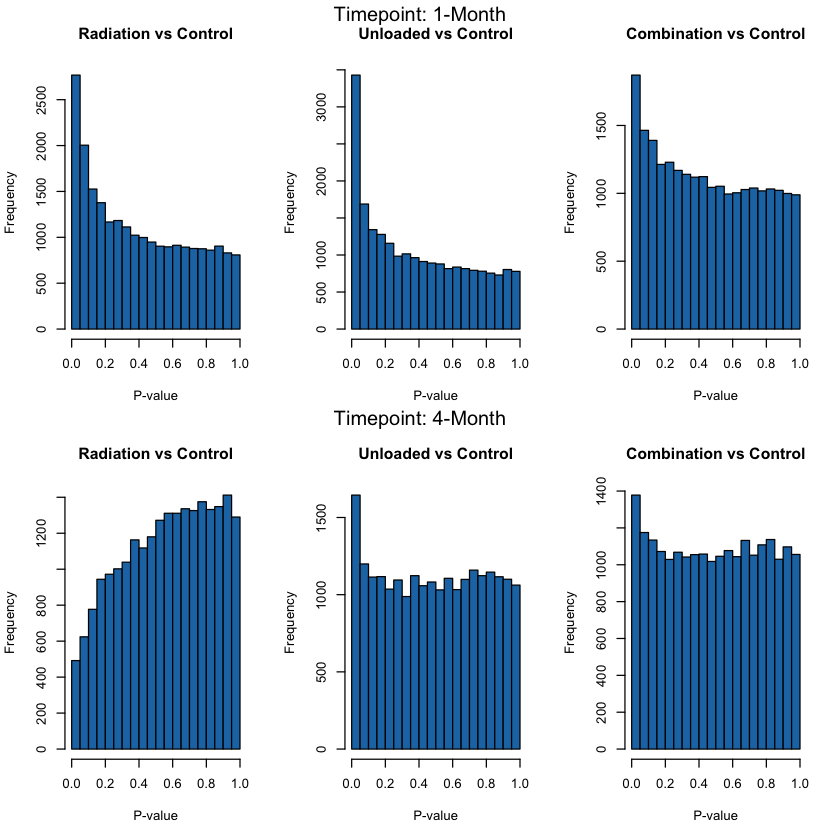

In [35]:
# Plot P-value Distributions for Each Comparison
par(mfrow=c(2,3))

hist(res_1month_radiation$pvalue, main="Radiation vs Control", xlab="P-value", col="#1f77b4")
hist(res_1month_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value", col="#1f77b4")
hist(res_1month_combination$pvalue, main="Combination vs Control", xlab="P-value", col="#1f77b4")

hist(res_4month_radiation$pvalue, main="Radiation vs Control", xlab="P-value", col="#1f77b4")
hist(res_4month_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value", col="#1f77b4")
hist(res_4month_combination$pvalue, main="Combination vs Control", xlab="P-value", col="#1f77b4")

mtext("Timepoint: 1-Month", side = 3, line = -1.5, outer = TRUE)
mtext("Timepoint: 4-Month", side = 3, line = -27, outer = TRUE)
